In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Función para calcular los coeficientes de regresión manualmente
def regresion_manual(X, y):
    # Agregar una columna de unos para el término independiente
    X = np.column_stack((np.ones(len(X)), X))

    # Calcular los coeficientes utilizando la fórmula de la pseudo inversa
    coeficientes = np.linalg.pinv(X.T @ X) @ X.T @ y

    return coeficientes

In [ ]:
# Función para predecir los valores de y
def predecir(X, coeficientes):
    # Xm = completar con lo mismo de la linea 7
    Xm = np.column_stack((np.ones(len(X)), X))

    return Xm @ coeficientes

In [ ]:
# Calcular métricas de evaluación manualmente
def rmse(y_true, y_pred):
    error = y_true - y_pred
    return np.sqrt(np.mean((error) ** 2))

In [ ]:
def r2F(y_true, y_pred):
    # https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n

    numerador = ((y_true - y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

In [ ]:
# Función para ajustar el modelo y evaluarlo
def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    return coeficientes, y_pred, r2_, rmse_val

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
opcion = int(input())
# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Mediciones.csv')
# Definir las columnas de características (X) y la columna de objetivo (y)
if opcion == 1:
    # imprimir numero de filas y numero de columnas
    print(data.shape)

    # seleccionar las caracteristicas(variables dependientes) y el objetivo
    caracteristicas = ['VTI_F', 'PEEP', 'BPM', 'VTE_F']
    objetivo = ['Pasos']
    print(caracteristicas)
    print('Pasos')
elif opcion == 2:
    # modelo completo solo con VTI_F, completar la funcion regresion manual
    X = data[['VTI_F']]
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print(coef)
elif opcion == 3:
    # modelo completo solo con VTI_F, completar las funciones que definen las métricas
    X = data[['VTI_F']]
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print(coef)
    y_pred = predecir(X, coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    # imprimir los primeros 2 elementos de y e y_pred
    print(y[:2], y_pred[:2])
    # imprimir r2 y rmse
    print(r2_, rmse_val)
elif opcion == 4:
    # modelo completo solo con VTI_F, completar la función ajustar_evaluar_modelo
    X_todo = data[['VTI_F']]
    y = data['Pasos']
    coeficientes_todo, y_pred_todo, r2_todo, rmse_todo = ajustar_evaluar_modelo(X_todo, y)
    print(r2_todo, rmse_todo)
elif opcion == 5:
    # Completar la combinaciones de características de los modelos solicitados
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM'],
        'Modelo_3': ['VTI_F', 'PEEP'],
        'Modelo_4': ['VTI_F', 'PEEP', 'BPM'],
        'Modelo_5': ['VTI_F', 'PEEP', 'BPM', 'VTE_F']
    }
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        print(nombre_modelo, r2, rmse_val)
        #print(coeficientes)
elif opcion == 6:
    # Modelos para cada combinación de PEEP y BPM
    valores_peep_unicos = data['PEEP'].unique()
    valores_bpm_unicos = data['BPM'].unique()
    print(valores_peep_unicos)
    print(valores_bpm_unicos)
    predicciones_totales = []
    for peep in valores_peep_unicos:
        for bpm in valores_bpm_unicos:
            datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)]
            X_subset = datos_subset[['VTI_F']]
            y_subset = datos_subset['Pasos']
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            print(peep, bpm, r2_subset, rmse_subset,coeficientes_subset)
            predicciones_totales.append(y_pred_subset)
    predicciones_concatenadas = np.concatenate(predicciones_totales)
    y = data['Pasos']
    r2_global = r2F(y, predicciones_concatenadas)
    rmse_global = rmse(y, predicciones_concatenadas)
    print('Global', r2_global, rmse_global,coeficientes_global)

    #resultados = pd.DataFrame(columns=['Modelo', 'R^2', 'RMSE'])
elif opcion == 7:
    # Crear un DataFrame para almacenar los resultados
    resultados = pd.DataFrame(columns=['Modelo', 'R^2', 'RMSE'])

    # Definir modelos y características
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM'],
        'Modelo_3': ['VTI_F', 'PEEP'],
        'Modelo_4': ['VTI_F', 'BPM', 'PEEP'],
        'Modelo_5': ['VTI_F', 'VTE_F', 'BPM', 'PEEP']
    }

    # Iterar sobre los modelos, ajustarlos, evaluarlos y guardar los resultados
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        resultados = pd.concat([resultados, pd.DataFrame([[nombre_modelo, r2, rmse_val]], columns=['Modelo', 'R^2', 'RMSE'])], ignore_index=True)

    # Mostrar los resultados en la consola
    print(resultados)

    # Grabar los resultados en un archivo CSV
    resultados.to_csv('resultados_modelos.csv', index=False)

6
[ 0 10]
[12 20]
0 12 0.9975786045111337 224.33132459276774 [9757.28353646   34.69955089]
0 20 0.9970035350957476 249.5523442644689 [9268.84164871   35.66205434]
10 12 0.9981629787974334 195.39531240805073 [9122.04081428   38.26722131]
10 20 0.9984773587292524 177.89176935322837 [8173.56205608   40.59468998]
Global 0.9978056192833918 213.5566233087256 [9288.85184784   36.72574487]


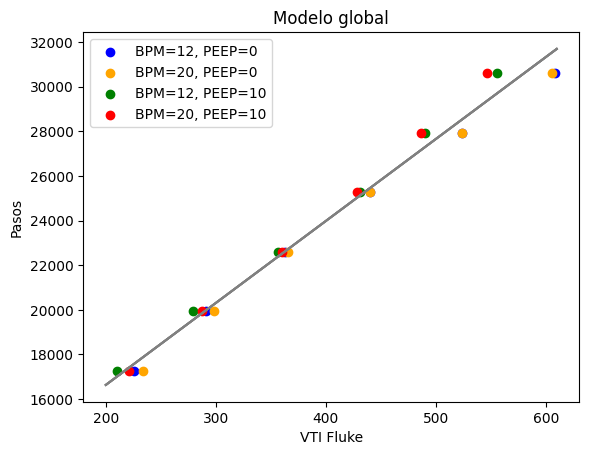

In [96]:
# Graficamos el modelo que mejor ajusta (Modelo global)
import matplotlib.pyplot as plt

colores = ['blue', 'orange', 'green', 'red']

datos = [
    data[(data['BPM'] == 12) & (data['PEEP'] == 0)],
    data[(data['BPM'] == 20) & (data['PEEP'] == 0)],
    data[(data['BPM'] == 12) & (data['PEEP'] == 10)],
    data[(data['BPM'] == 20) & (data['PEEP'] == 10)]
]

for i, (datos_subset, color) in enumerate(zip(datos, colores)):

    x=np.linspace(200,610,1000)
    y_1=9288.85184784 + 36.72574487 * x # utilizamos los coeficientes del modelo global
    #y_2=9268.84164871 + 36.72574487 * x
    #y_3=9122.04081428 + 36.72574487 * x
    #y_4=8173.56205608 + 36.72574487 * x
    X_subset = datos_subset['VTI_F']
    y_subset = datos_subset['Pasos']
    plt.scatter(X_subset, y_subset, color=color, label=f'BPM={datos_subset["BPM"].iloc[0]}, PEEP={datos_subset["PEEP"].iloc[0]}')
    plt.plot(x,y_1,color="grey")
    #plt.plot(x,y_2,color="red")
    #plt.plot(x,y_3,color="grey")
    #plt.plot(x,y_4,color="blue")
plt.xlabel('VTI Fluke')
plt.ylabel('Pasos')
plt.title('Modelo global')
plt.legend()
plt.show()

In [ ]:
data

,PEEP,BPM,Volumen,VTI,VTE,VTI_F,VTE_F,Pasos,PEEPV
0,0,12,200,251,116,226,233,17264,0.0
1,0,12,250,311,178,291,297,19934,0.0
2,0,12,300,378,242,363,367,22603,0.0
3,0,12,350,458,312,440,443,25273,0.0
4,0,12,400,524,382,524,526,27942,0.0
5,0,12,450,598,455,608,614,30611,0.0
6,0,20,200,227,141,234,236,17264,0.0
7,0,20,250,278,186,298,300,19934,0.0
8,0,20,300,330,256,366,368,22603,0.0
9,0,20,350,393,309,440,442,25273,0.0
